## House price prediction
The objective of this notebook is to explore techiniques for **data visualization, cleaning** and traning of different **ML models** to predict the price of a property.

It is based on the Properati Dataset, which gathers real state information from [Properati site](https://www.properati.com.ar/) 

#Dps decidir como poner accesible el dataset

### Library Loading

In [121]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import logging
import random

from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


import geopandas
from geodatasets import get_path
from shapely.geometry import Polygon, Point

pd.set_option('display.max_columns', None)

### Data Loading

In [3]:
#Load dataset
df=pd.read_parquet(r"D:\Documentos\BACK UP RED INBIRS. 20221011\Doctorado\Cursos\Data Mining\1er año\DM\entrenamiento_parquet_3").convert_dtypes()
df.set_index("id", inplace= True)
#Read first row
df.head()

c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


,lat,lon,country,city,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,
556713,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,3,2,2,<NA>,<NA>,USD,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
192912,-58.430493,-34.60662,Argentina,Capital Federal,Almagro,3,2,2,77,67,USD,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
238224,-58.49176,-34.574123,Argentina,Capital Federal,Villa Urquiza,2,<NA>,1,60,55,USD,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
257134,-58.420737,-34.63177,Argentina,Capital Federal,Boedo,2,1,1,74,47,USD,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,3,2,1,66,64,USD,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [4]:
#Examine columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992192 entries, 556713 to 1000000
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              838994 non-null  Float64
 1   lon              839929 non-null  Float64
 2   country          992192 non-null  string 
 3   city             992192 non-null  string 
 4   neighborhood     934737 non-null  string 
 5   rooms            503045 non-null  Int64  
 6   bedrooms         390699 non-null  Int64  
 7   bathrooms        773021 non-null  Int64  
 8   surface_total    448164 non-null  Int64  
 9   surface_covered  436961 non-null  Int64  
 10  currency         944941 non-null  string 
 11  title            992164 non-null  string 
 12  description      992170 non-null  string 
 13  property_type    992192 non-null  string 
 14  operation_type   992192 non-null  string 
 15  price            947811 non-null  Float64
dtypes: Float64(3), Int64(5), string(8)
me

In [5]:
df.shape

(992192, 16)

In [6]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,838994.0,839929.0,503045.0,390699.0,773021.0,448164.0,436961.0,947811.0
mean,-59.266586,-34.793745,2.858577,2.086094,1.697637,493.51136,576.953341,288168.736682
std,2.707383,3.066257,1.682454,2.705342,1.072722,4101.38179,73839.980806,5560862.702558
min,-180.0,-54.842464,1.0,-13.0,1.0,-200.0,-170.0,0.0
25%,-58.756011,-34.921709,2.0,1.0,1.0,50.0,45.0,39000.0
50%,-58.444383,-34.610508,3.0,2.0,1.0,95.0,75.0,98000.0
75%,-58.058983,-34.459156,4.0,3.0,2.0,270.0,155.0,210000.0
max,-35.045025,85.051129,40.0,900.0,20.0,200000.0,27000000.0,3100000000.0


### Understanding and filtering the data

Axes(0.125,0.11;0.775x0.77)


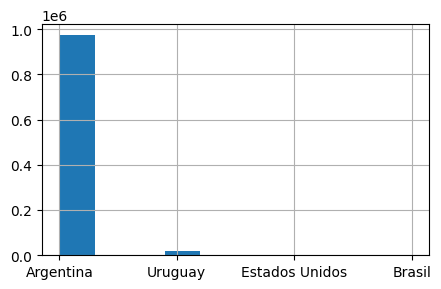

In [7]:
#¿Which countrys are representated in the dataset?
print(df["country"].hist(figsize=(5,3)))

#We are only interested in Argentina
df=df[df["country"]=="Argentina"]


Axes(0.125,0.11;0.775x0.77)


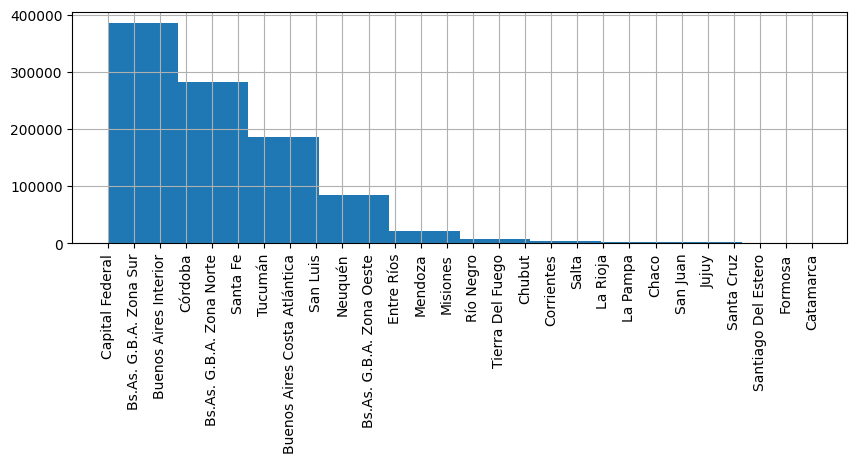

In [8]:
#¿Which cities of Argentina are represented in the dataset?
print(df["city"].hist(figsize=(10,3), xrot=90))

#We are only interested in Capital Federal
df=df[df["city"]=="Capital Federal"]

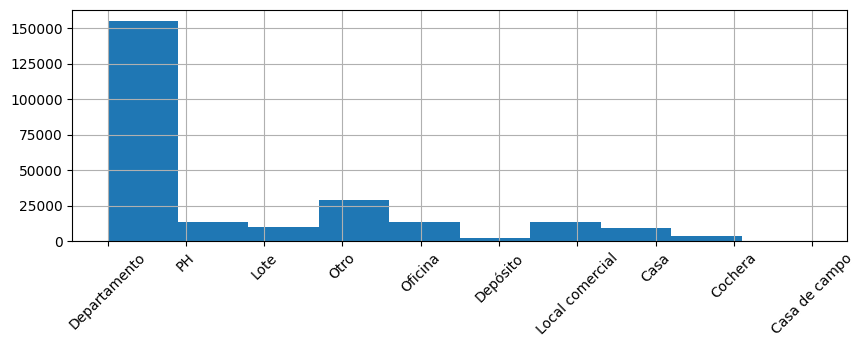

In [9]:
#What kind of properties are in Capital Federal?
df["property_type"].hist(figsize=(10,3), xrot=45)

#We are only interested in "Departamento"
df=df[df["property_type"]=="Departamento"]

In [10]:
#What kind of operation types are published?
print(df["operation_type"].value_counts())

#What types of currencies are published?
print(df["currency"].value_counts())

#We are only interesented in Sell operation in USD
df=df[(df["operation_type"]=="Venta") & (df["currency"]=="USD")]

operation_type
Venta                105377
Alquiler              36825
Alquiler temporal     13085
Name: count, dtype: Int64
currency
USD    108109
ARS     42495
Name: count, dtype: Int64


In [11]:
df.columns

Index(['lat', 'lon', 'country', 'city', 'neighborhood', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'currency', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [12]:
df.shape

(100232, 16)

In [13]:
#Knowing that these properties are from Argentina, we can see that there is something strange with latitude and longitude: 
print(df[["lat", "lon"]].head())
# They are switched. Capital Federal´s correct LATITUDE is around -34.5

#We switch the labels to the correct order
df=df.rename(columns={"lat":"lon", "lon":"lat"})

              lat        lon
id                          
556713 -58.442399 -34.573623
192912 -58.430493  -34.60662
238224  -58.49176 -34.574123
521738 -58.429983 -34.607225
499733 -58.404054 -34.599623


### Data Filtering and NaN imputation

In [14]:
#Looking at min and max values of latitude and longitude we can see that this data is excessively scattered.
df[["lat", "lon"]].describe()
#Remember that Capital Federal´s correct LATITUDE is around -34.5


,lat,lon
count,91541.0,91485.0
mean,-34.57699,-58.473705
std,0.329418,0.464062
min,-53.788249,-71.356235
25%,-34.611902,-58.456793
50%,-34.597704,-58.43413
75%,-34.579807,-58.411583
max,1.0,-55.893563


In [15]:
#  We are going to filter to obtain only the properties that are inside the limits of "Capital Federal" City
df=df[(df["lon"]>-59) & (df["lon"]< -58) & (df["lat"]< -34.5) & (df["lat"]> -34.7)]

In [16]:
#Properties form the shape of the city, as we can see when we compare it with a geopandas map

#Load map of "Capital Federal"
gdf_barrios = geopandas.read_file("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson")

#Comparation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

#Scatter of properties on ax1
df.plot.scatter("lon", "lat", ax=ax1)
ax1.set_title("Scatter plot of houses")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.tick_params(axis="x", rotation=45)

#Geopandas on ax2
gdf_barrios.plot(ax=ax2)
ax2.set_title("Map of Capital Federal")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.tick_params(axis="x", rotation=45)

fig.tight_layout()
plt.show()

DriverError: CURL error: Failed to connect to cdn.buenosaires.gob.ar port 443 after 21037 ms: Couldn't connect to server

### Nan imputation

NaN values are common in real-life datasets and most machine learning algoriths don´t support them

One simple approach would be to drop all the rows with NaN values.

However, that implies the lost of information, and taking into account that predictive models work better when they are trained with large amount of data it´s crucial to find ways to impute the missing information

In [17]:
# First lets build a simple function to count NaN values across columns so we can keep track of them
def nulos(df):
      NaN_list=[]
      Not_Nan_list=[]

      for c in df.columns:
            NaN_list.append(df[c].isna().sum())
            Not_Nan_list.append(df[c].notna().sum())

      NaN_df=pd.DataFrame(
      {"Nan":NaN_list,
      "Not NaN": Not_Nan_list},
      index=df.columns 
      )

      return NaN_df

nulos(df) #There are several NaN values in different columns

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,4954,85474
bedrooms,28436,61992
bathrooms,4141,86287
surface_total,18391,72037
surface_covered,17356,73072


#### Surface imputation

We can think in 3 conditions:
1. Its not an imputation problem, but a correction on wrong data
If surface_total < surface_covered, it means that the data has been wrongly loaded, so we switch the values 

2. If surface_covered is NaN but surface_total is not, we can use the information of the latter to imput the former.

3. And we can have a similar approach if surface_total is NaN but surface_covered is not

In [18]:
def impute_surface(df):
    df = df.copy()

    # Condition 1: surface_total < surface_covered → Swap
    mask_swap = (df["surface_total"] < df["surface_covered"])
    df.loc[mask_swap, ["surface_total", "surface_covered"]] = df.loc[mask_swap, ["surface_covered", "surface_total"]].values

    # Condición 2: surface_covered is NaN but surface_total is not
    mask_cov_na = df["surface_covered"].isna() & df["surface_total"].notna()
    df.loc[mask_cov_na, "surface_covered"] = df.loc[mask_cov_na, "surface_total"]

    # Condición 3: surface_total is NaN but surface_covered is not
    mask_tot_na = df["surface_total"].isna() & df["surface_covered"].notna()
    df.loc[mask_tot_na, "surface_total"] = df.loc[mask_tot_na, "surface_covered"]

    return df

### Imputation from title and description columns with regular expressions

In [19]:
def impute_surface2(df):
    df=df.copy()

    """
    Extracts surface area information (m2) from the title and description
    for rows with missing surface_total or surface_covered,
    and uses it to impute missing values.
    """

    # Regex pattern to extract surface values like "50 m2", "50m²", "50 metros cuadrados"
    pattern = r"(?i)(\d{1,4})\s*(m2|m²|metros|metros cuadrados)"

    # Mask rows where we need to impute
    mask = df['surface_total'].isna() | df['surface_covered'].isna()

    # Apply regex only to filtered rows
    df.loc[mask, 'surface_title'] = df.loc[mask, 'title'].str.extract(pattern)[0]
    df.loc[mask, 'surface_description'] = df.loc[mask, 'description'].str.extract(pattern)[0]

    # Combine extracted values
    df['surface_extracted'] = df['surface_title'].fillna(df['surface_description'])
    df['surface_extracted'] = pd.to_numeric(df['surface_extracted'], errors='coerce')

    # Count how many we'll impute
    count_total = df['surface_total'].isna().sum()
    count_covered = df['surface_covered'].isna().sum()

    # Impute missing values
    df['surface_total'] = df['surface_total'].fillna(df['surface_extracted'])
    df['surface_covered'] = df['surface_covered'].fillna(df['surface_extracted'])

    # Final count of actual imputations (after fillna)
    imputed_total = count_total - df['surface_total'].isna().sum()
    imputed_covered = count_covered - df['surface_covered'].isna().sum()

    print(f"Imputed {imputed_total} values in 'surface_total' and {imputed_covered} in 'surface_covered' using extracted text.")

    # Drop intermediate columns
    df.drop(['surface_title', 'surface_description', 'surface_extracted'], axis=1, inplace=True)

    return df


In [20]:
df=impute_surface2(df)

Imputed 4883 values in 'surface_total' and 4967 in 'surface_covered' using extracted text.


In [21]:
def impute_rooms(df):
    df = df.copy()
    
    # Regular expression for differente number of rooms ("ambiente")
    pattern1 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|mono)\s*-?\s*amb(?:iente)?s?"
    
    # Word-number mapping
    number_map = {
        "un": "1", "uno": "1", "dos": "2", "tres": "3", "cuatro": "4", "cinco": "5",
        "seis": "6", "siete": "7", "ocho": "8", "nueve": "9", "diez": "10"
    }
    
    # Look for NaN in rooms
    mask = df['rooms'].isna()
    count_before = mask.sum()
    
    # Get number of rooms from title and description
    df.loc[mask, "ambientes_title"] = df.loc[mask, "title"].str.extract(pattern1, expand=False)
    df.loc[mask, "ambientes_description"] = df.loc[mask, "description"].str.extract(pattern1, expand=False)
    
    # Replace "mono" for 1
    df.loc[mask, "ambientes_title"] = df.loc[mask, "ambientes_title"].str.lower().replace("mono", "1")
    df.loc[mask, "ambientes_description"] = df.loc[mask, "ambientes_description"].str.lower().replace("mono", "1")
    
    # Change numbers in words to digits
    df.loc[mask, "ambientes_title"] = df.loc[mask, "ambientes_title"].str.lower().replace(number_map)
    df.loc[mask, "ambientes_description"] = df.loc[mask, "ambientes_description"].str.lower().replace(number_map)
    
    # Fill new columns
    df['rooms_2'] = df['rooms'].fillna(df['ambientes_title']).fillna(df['ambientes_description'])
    
    # Clean new columns
    df['rooms_2'] = pd.to_numeric(df['rooms_2'], errors='coerce')

    # Reeplace new values
    df['rooms'] = df['rooms_2']

    # Count of imputated values
    count_after = df['rooms'].isna().sum()
    imputed_count = count_before - count_after

    # Drop intermediate columns
    df = df.drop(["ambientes_title", "ambientes_description", "rooms_2"], axis=1)
        
    print(f"{imputed_count} 'rooms' values were imputed")
    return df
    


In [22]:
df=impute_rooms(df)

4270 'rooms' values were imputed


In [23]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,684,89744
bedrooms,28436,61992
bathrooms,4141,86287
surface_total,13508,76920
surface_covered,12389,78039


In [24]:
# Since there are still some NaN we are gonna imputed based on the surface covered

def impute_rooms2(df):
    """
    Imputes the number of rooms based on the covered surface area
    when this information cannot be extracted from text.

    Assumes typical apartment room sizes:
    - <= 36 m2 → 1 room
    - 36–50 m2 → 2 rooms
    - 51–72 m2 → 3 rooms
    - > 72 m2 → 4 rooms

    Also prints the number of imputations made for each range.
    """

    df = df.copy()  # Avoid modifying the original DataFrame

    # Define masks for each surface range where 'rooms' is NaN
    mask1 = df['rooms'].isna() & (df['surface_covered'] <= 36)
    mask2 = df['rooms'].isna() & (df['surface_covered'] > 36) & (df['surface_covered'] <= 50)
    mask3 = df['rooms'].isna() & (df['surface_covered'] > 50) & (df['surface_covered'] <= 72)
    mask4 = df['rooms'].isna() & (df['surface_covered'] > 72)

    # Assign room values based on surface ranges
    df.loc[mask1, 'rooms'] = 1
    df.loc[mask2, 'rooms'] = 2
    df.loc[mask3, 'rooms'] = 3
    df.loc[mask4, 'rooms'] = 4

    # Log how many imputations were done per range
    print("Rooms imputed based on covered surface:")
    print(f"  • 1 room (<= 36 m2): {mask1.sum()}")
    print(f"  • 2 rooms (36–50 m2): {mask2.sum()}")
    print(f"  • 3 rooms (51–72 m2): {mask3.sum()}")
    print(f"  • 4 rooms (> 72 m2): {mask4.sum()}")

    return df


In [25]:
df=impute_rooms2(df)

Rooms imputed based on covered surface:
  • 1 room (<= 36 m2): 189
  • 2 rooms (36–50 m2): 58
  • 3 rooms (51–72 m2): 42
  • 4 rooms (> 72 m2): 151


In [26]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,244,90184
bedrooms,28436,61992
bathrooms,4141,86287
surface_total,13508,76920
surface_covered,12389,78039


#### We imputed more than 95% of original NaN values. Not bad! Lets do similar with the rest of the features

In [27]:
def impute_bedrooms(df):
    # Regex patterns to extract bedroom mentions from text
    pattern1 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*dorm"
    pattern2 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*habitacion"
    pattern3 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*cuarto"

    # Extract possible bedroom numbers from title and description
    df["dormitorios_title"] = df["title"].str.extract(pattern1, expand=False)
    df["dormitorios_description"] = df["description"].str.extract(pattern1, expand=False)
    df["habitacion_title"] = df["title"].str.extract(pattern2, expand=False)
    df["habitacion_description"] = df["description"].str.extract(pattern2, expand=False)
    df["cuarto_title"] = df["title"].str.extract(pattern3, expand=False)
    df["cuarto_description"] = df["description"].str.extract(pattern3, expand=False)

    # Map written numbers to digits
    number_map = {
        "un": "1", "uno": "1", "dos": "2", "tres": "3", "cuatro": "4", "cinco": "5",
        "seis": "6", "siete": "7", "ocho": "8", "nueve": "9", "diez": "10"
    }

    for col in [
        "dormitorios_title", "dormitorios_description",
        "habitacion_title", "habitacion_description",
        "cuarto_title", "cuarto_description"
    ]:
        df[col] = df[col].str.lower().replace(number_map)

    # Impute bedrooms: use extracted features and then fallback to 'rooms'
    fill_order = [
        "bedrooms", "dormitorios_title", "dormitorios_description",
        "cuarto_title", "cuarto_description",
        "habitacion_title", "habitacion_description",
        "rooms"
    ]

    # Save the initial number of NaNs
    n_initial_na = df["bedrooms"].isna().sum()

    # Impute using backfill across selected columns
    df["bedrooms"] = df[fill_order].bfill(axis=1).iloc[:, 0]
    df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")

    # Calculate how many were imputed
    n_final_na = df["bedrooms"].isna().sum()
    n_imputed = n_initial_na - n_final_na
    logging.info(f"Imputed {n_imputed} missing values in 'bedrooms'")

    # Drop intermediate columns
    df = df.drop([
        "dormitorios_title", "dormitorios_description",
        "habitacion_title", "habitacion_description",
        "cuarto_title", "cuarto_description"
    ], axis=1)

    return df



In [28]:
df=impute_bedrooms(df)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19416\4229297569.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["bedrooms"] = df[fill_order].bfill(axis=1).iloc[:, 0]


In [29]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,244,90184
bedrooms,142,90286
bathrooms,4141,86287
surface_total,13508,76920
surface_covered,12389,78039


In [30]:
def impute_bedrooms2(df):
    # Create a mask where 'bedrooms' is NaN and 'rooms' is not NaN
    mask = df["bedrooms"].isna() & df["rooms"].notna()
    
    # Count how many values will be imputed
    imputed_count = mask.sum()
    
    # Perform the imputation
    df.loc[mask, "bedrooms"] = df.loc[mask, "rooms"] - 1
    
    # Show the result
    print(f"Imputed {imputed_count} values of 'bedrooms' from 'rooms - 1'.")

    return df


In [31]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,244,90184
bedrooms,142,90286
bathrooms,4141,86287
surface_total,13508,76920
surface_covered,12389,78039


In [32]:
def impute_bathrooms(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Regex patterns to extract bedroom mentions from text
    pattern1 = r"(?i)(\d+|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*baño"

    # Look for NaN in bathrooms
    mask = df['bathrooms'].isna()
    count_before = mask.sum()

    # Extract possible bathroom numbers from title and description
    df.loc[mask, "baños_title"] = df.loc[mask, "title"].str.extract(pattern1, expand=False)
    df.loc[mask, "baños_description"] = df.loc[mask, "description"].str.extract(pattern1, expand=False)

    # Map written numbers to digits
    number_map = {
        "un": "1", "uno": "1", "dos": "2", "tres": "3", "cuatro": "4", "cinco": "5",
        "seis": "6", "siete": "7", "ocho": "8", "nueve": "9", "diez": "10"
    }

    # Change numbers in words to digits
    df.loc[mask, "baños_title"] = df.loc[mask, "baños_title"].str.lower().replace(number_map)
    df.loc[mask, "baños_description"] = df.loc[mask, "baños_description"].str.lower().replace(number_map)
    
    # Fill new columns
    df['baños_2'] = df['bathrooms'].fillna(df['baños_title']).fillna(df['baños_description'])
    
    # Clean new columns
    df['baños_2'] = pd.to_numeric(df['baños_2'], errors='coerce')

    # Reeplace new values
    df['bathrooms'] = df['baños_2']

    # Count of imputated values
    count_after = df['bathrooms'].isna().sum()
    imputed_count = count_before - count_after

    # Drop intermediate columns
    df = df.drop(["baños_title", "baños_description", "baños_2"], axis=1)
        
    print(f"{imputed_count} 'baños' values were imputed")
    return df
    


In [33]:
df=impute_bathrooms(df)

491 'baños' values were imputed


In [34]:
nulos(df)

,Nan,Not NaN
lon,0,90428
lat,0,90428
country,0,90428
city,0,90428
neighborhood,61,90367
rooms,244,90184
bedrooms,142,90286
bathrooms,3650,86778
surface_total,13508,76920
surface_covered,12389,78039


### Lets see how our data looks after these imputations

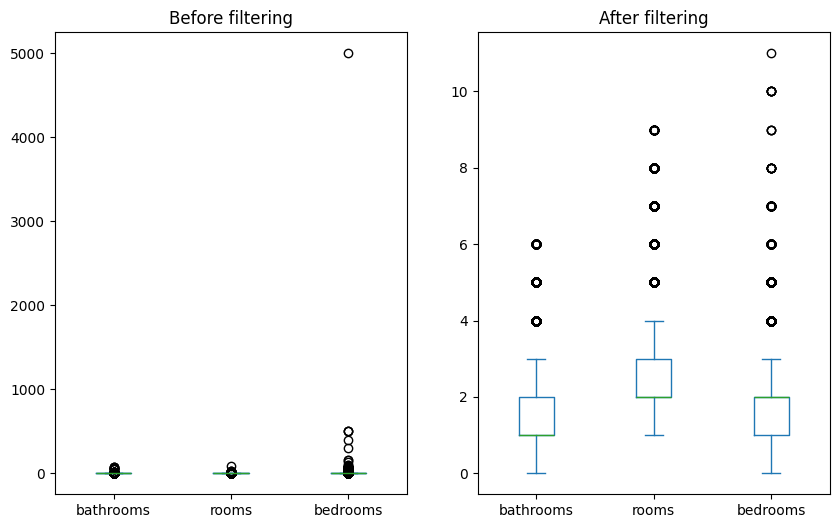

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

df[["bathrooms", "rooms", "bedrooms"]].plot(kind="box", ax=ax1)
ax1.set_title("Before filtering")

#We can clearly see that there a lot of outliers. Since we are working with "Department", lets filter based on a logical amount of features
df=df[(df["bathrooms"]<7) & (df["rooms"]<10) & (df["bedrooms"]<15)]

#After filtering
df[["bathrooms", "rooms", "bedrooms"]].plot(kind="box", ax=ax2)
ax2.set_title("After filtering")

plt.show()

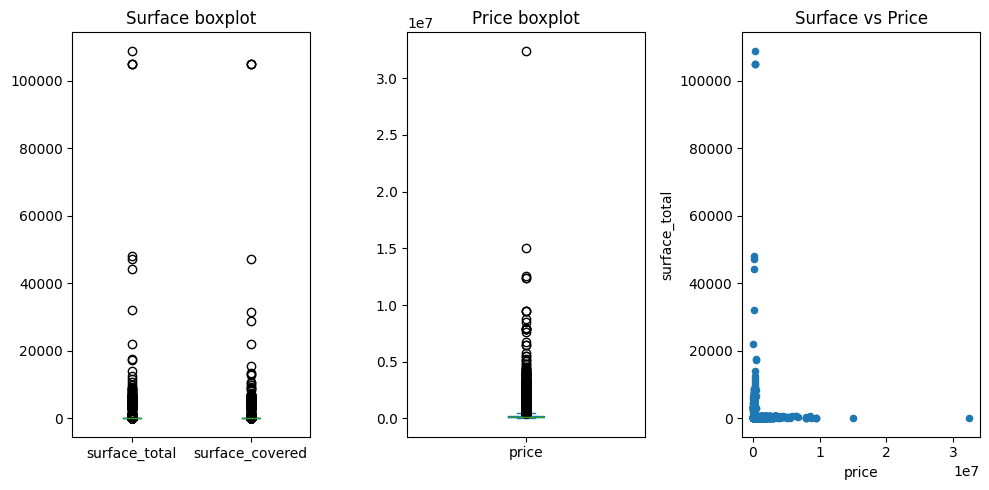

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

df[["surface_total", "surface_covered"]].plot(kind="box", ax=ax1)
ax1.set_title("Surface boxplot")

df["price"].plot(kind="box", ax=ax2)
ax2.set_title("Price boxplot")

df.plot.scatter("price", "surface_total", ax=ax3)
ax3.set_title("Surface vs Price")

fig.tight_layout()
plt.show()


#### There are many outliers on surface and price, and several properties with high price but low surface
This is causing a strage behaiviour in the surface vs price scatter plot, as one would expect a linear relationship.

We assign a mean value of 72 m2 for a property of 4 rooms...so values much higher than that are strange...lets investigate it 


In [37]:
high_surface= df[df["surface_total"]>1000]
high_surface["title"]

id
139033      Venta Almagro Departamento 3 ambientes luminoso
112503    3 ambientes con Balcon, luminoso excelente estado
112506      3 ambientes contrafrente con balcon y cochera!!
626590          TRES AMBIENTES EN EL COMPLEJO CATALINA SUR.
652277    1247m2 Totales      ( Cubiertos 94 m2 - Descub...
                                ...                        
942718    VENTA 4 AMBIENTES C/DEPEN-BARRIO NORTE OPORTUN...
942720    VENTA 4 AMBIENTES C/DEPEN-BARRIO NORTE OPORTUN...
946404    VENTA DEPARTAMENTO 3 AMBIENTES CABALLITO/PARQU...
963983                  DEPARTAMENTO DOS AMBIENTES CABALITO
994027                             Monoambiente en Congreso
Name: title, Length: 125, dtype: string

In [38]:
print(high_surface["rooms"].mean())
print(high_surface["bedrooms"].mean())

2.192
1.504


The mean value of rooms for this properties is 2. So it reasonable to think that the values of surface are incorrect.
We gonna imput them with our previous arbitrary classification where:

1 room → 36 m2 

2 rooms → 40 m2

3 rooms → 55 m2

4 rooms → 75 m2


In [39]:
mask_high_surface=((df["surface_covered"] > 1000) | (df["surface_total"] > 1000))
mask_1room= df["rooms"]==1
mask_2rooms= df["rooms"]==2
mask_3rooms= df["rooms"]==3
mask_4rooms= df["rooms"]>=4

df.loc[(mask_high_surface & mask_1room), ["surface_total", "surface_covered"]] = [36, 36]
df.loc[(mask_high_surface & mask_2rooms), ["surface_total", "surface_covered"]] = [40, 40]
df.loc[(mask_high_surface & mask_3rooms), ["surface_total", "surface_covered"]] = [55, 55]
df.loc[(mask_high_surface & mask_4rooms), ["surface_total", "surface_covered"]] = [75, 75]


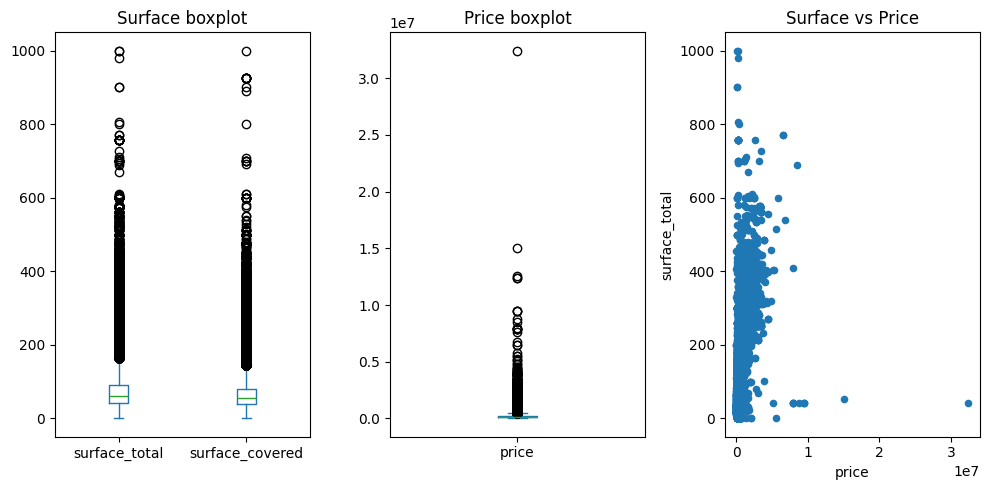

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

df[["surface_total", "surface_covered"]].plot(kind="box", ax=ax1)
ax1.set_title("Surface boxplot")

df["price"].plot(kind="box", ax=ax2)
ax2.set_title("Price boxplot")

df.plot.scatter("price", "surface_total", ax=ax3)
ax3.set_title("Surface vs Price")

fig.tight_layout()
plt.show()


#### Getting better. Now lets investigates the properties with extreme high prices

In [41]:
high_price=df[df["price"]>5000000]
high_price.describe()


,lon,lat,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,25.0,25.0,25.0,25.000000,25.0,21.0,21.0,25.0
mean,-58.426849,-34.593134,3.08,2.440000,2.44,265.238095,257.428571,9183204.44
std,0.030143,0.020648,2.039608,1.386843,1.709776,284.576511,242.44042,5496453.608387
min,-58.464222,-34.616931,1.0,1.000000,1.0,0.0,37.0,5100000.0
25%,-58.446543,-34.606544,1.0,1.000000,1.0,41.0,37.0,6500000.0
50%,-58.440101,-34.606544,3.0,3.000000,1.0,43.0,48.0,7897000.0
75%,-58.415855,-34.576518,5.0,4.000000,4.0,516.0,500.0,9477000.0
max,-58.361275,-34.548967,8.0,5.000000,6.0,771.0,611.0,32434232.0


In [42]:
high_price["neighborhood"].unique()

<StringArray>
[      'Palermo',     'Caballito',      'Belgrano', 'Villa Ortuzar',
 'Puerto Madero',      'Recoleta',  'Villa Crespo']
Length: 7, dtype: string

### They seem like normal properties (not to big, not in very expensive neighorhoods).
So the price MUST be a mistake. However since price is our target variable and we dont have a safe to imput it, we are going to drops these properties.

There are also some properties with still extreme surface values and low prices, so we are also going to drop them

In [43]:
mask_st=  (df['surface_total']>30) & (df['surface_total']<650) 
mask_sc= (df['surface_covered']>25) & (df['surface_covered']<550) 
mask_price= (df['price']>1000) & (df['price']<5000000) 



In [44]:
df= df[(mask_st & mask_sc & mask_price)]

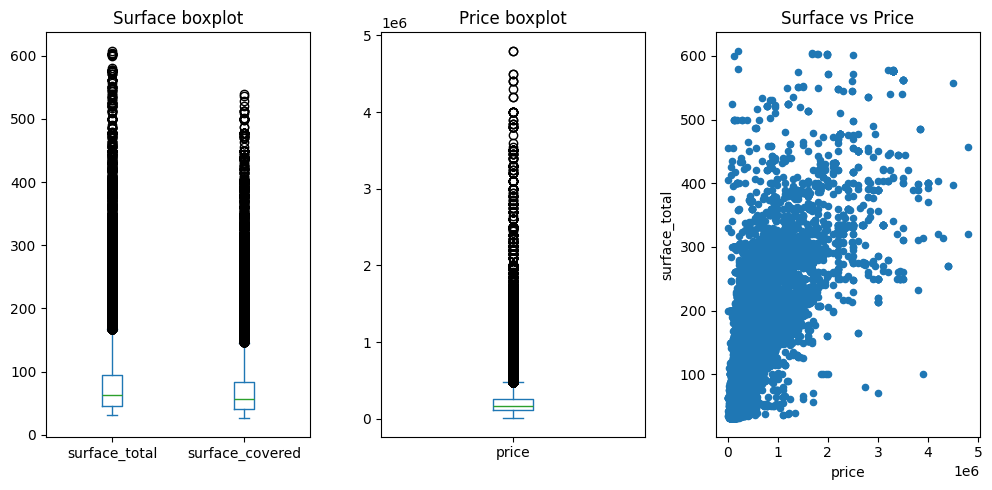

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))

df[["surface_total", "surface_covered"]].plot(kind="box", ax=ax1)
ax1.set_title("Surface boxplot")

df["price"].plot(kind="box", ax=ax2)
ax2.set_title("Price boxplot")

df.plot.scatter("price", "surface_total", ax=ax3)
ax3.set_title("Surface vs Price")

fig.tight_layout()
plt.show()


### This looks much more reasonable

Plus, we have filtered out most of properties with NaN values that we weren´t able to imput before.

In [46]:
nulos(df)

,Nan,Not NaN
lon,0,69676
lat,0,69676
country,0,69676
city,0,69676
neighborhood,16,69660
rooms,0,69676
bedrooms,0,69676
bathrooms,0,69676
surface_total,0,69676
surface_covered,0,69676


There are only 5 properties without the neighborhood. We can let them go

In [47]:
df=df[df["neighborhood"].notna()]

### Extra features

We are going to extract more information from the description columns to add as features.

 We are gonna look for extra characteristics or amenities that could be related to the price

In [48]:
def extra_feat(df):
    df = df.copy()

    df.loc[:, "parking"] = df.description.str.contains(r"(?i)cochera|estacionamiento|garage", na=False).astype(int)
    df.loc[:, "amenities"] = df.description.str.contains(r"(?i)amenitie|amenity", na=False).astype(int)
    df.loc[:, "pool"] = df.description.str.contains(r"(?i)pileta|piscina|pisina|picina", na=False).astype(int)
    df.loc[:, "new"] = df.description.str.contains(r"(?i)estren|nuevo", na=False).astype(int)
    df.loc[:, "balcony"] = df.description.str.contains(r"(?i)balc|terr|patio|parque", na=False).astype(int)
    df.loc[:, "security"] = df.description.str.contains(r"(?i)seguridad|camara|cámara|vigilancia|guardia", na=False).astype(int)
    df.loc[:, "subway"] = df.description.str.contains(r"(?i)subte", na=False).astype(int)
    df.loc[:, "metrobus"] = df.description.str.contains(r"(?i)metrobus", na=False).astype(int)
    df.loc[:, "gym"] = df.description.str.contains(r"(?i)gym|gimnasio|gimnacio", na=False).astype(int)
    df.loc[:, "sum"] = df.description.str.contains(r"(?i)sum", na=False).astype(int)
    df.loc[:, "barbacue"] = df.description.str.contains(r"(?i)parrilla", na=False).astype(int)

    df.loc[:, "amenities_score"] = df[[
        "parking", "amenities", "pool", "new", "balcony", "security",
        "subway", "metrobus", "gym", "sum", "barbacue"
    ]].sum(axis=1)

    return df


In [49]:
df=extra_feat(df)

Neighborhood is a cathegorical feature, we are gonna transform it a boolean type for the ML algorith

In [50]:
df = pd.get_dummies(df, columns=['neighborhood'], drop_first=True, dtype=int)

#### Column selection for models (only numerical or boolean)

In [51]:
df.drop(["country", "city", "title", "description", "operation_type", "currency", "property_type"], axis=1, inplace=True)

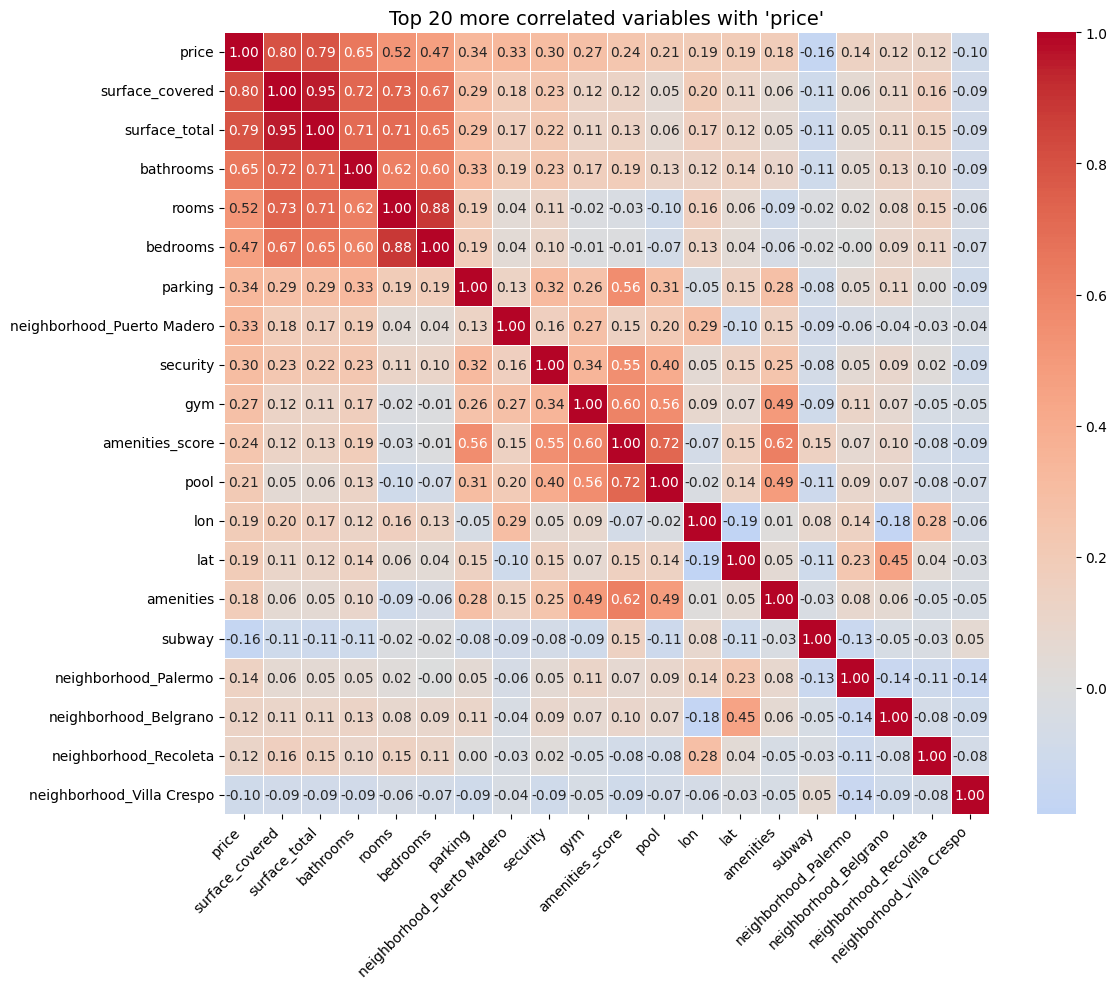

In [138]:
pd.set_option('display.max_rows', 20)
correlations=df.corr()["price"].sort_values(ascending=False, key=lambda x: np.abs(x))

# Seleccionar top 20 features más correlacionadas con 'price'
top_features = correlations.index[:20]

# Matriz de correlación para esas variables
corr_matrix = df[top_features].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Top 20 more correlated variables with 'price'", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

We can see that the original variables are the ones with highest correlation with price.

There are some new features that have an important correlation with price such as the location of the property in Puerto Madero, aswell as having a gym, parking, security.

For simplicity we are only going to keep the top_features

In [139]:
df_simple=df[top_features]

In [140]:
X = df_simple.copy().drop(columns=['price'])
y = df_simple['price']


Lineal Regression

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19416\1619269945.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_resultados_melted, x="Set", y="MSE", ax=axes[0], palette="Set2")
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Dellia\AppData\Local\Program

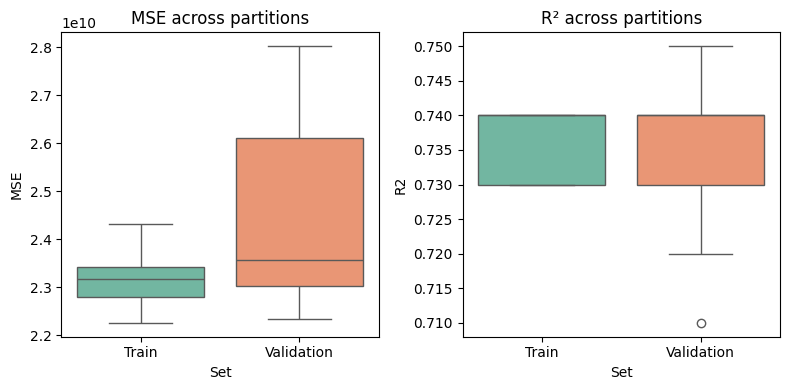

In [147]:
msq_linear_list = []
r2_linear_list = []

msq_train_linear_list = []
r2_train_linear_list = []


partitions = {}

random_states = [1,5,49,42,6,15,45,12,98,10]

for i in random_states:
    # Split original data
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=i)

    # Save partictions for later
    partitions[i] = {
        "X_train": X_train.copy(),
        "y_train": y_train.copy(),
        "X_val": X_val.copy(),
        "y_val": y_val.copy(),
        "X_test": X_test.copy(),
        "y_test": y_test.copy()
    }

    # Normalization
    cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
    scaler = StandardScaler()
    
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    
    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train[cols_a_escalar])
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val[cols_a_escalar])

    # Linear model training
    reg_linear = LinearRegression()
    reg_linear.fit(X_train_scaled, y_train)

    # Prediction on training set
    y_train_pred = reg_linear.predict(X_train_scaled)
    msq_train_linear_list.append(round(mean_squared_error(y_train, y_train_pred), 2))
    r2_train_linear_list.append(round(r2_score(y_train, y_train_pred), 2))

    # Prediction on validation set
    y_val_pred = reg_linear.predict(X_val_scaled)
    msq_linear_list.append(round(mean_squared_error(y_val, y_val_pred), 2))
    r2_linear_list.append(round(r2_score(y_val, y_val_pred), 2))

# Prepare data for visualization
df_resultados_melted = pd.DataFrame({
    "MSE": msq_train_linear_list + msq_linear_list,
    "R2": r2_train_linear_list + r2_linear_list,
    "Set": ["Train"] * len(msq_train_linear_list) + ["Validation"] * len(msq_linear_list)
})

# Plotting MSE and R2 side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# MSE Plot
sns.boxplot(data=df_resultados_melted, x="Set", y="MSE", ax=axes[0], palette="Set2")
axes[0].set_title("MSE across partitions")

# R2 Plot
sns.boxplot(data=df_resultados_melted, x="Set", y="R2", ax=axes[1], palette="Set2")
axes[1].set_title("R² across partitions")

plt.tight_layout()
plt.show()

Where are going to graph predictions on 3 random partitions

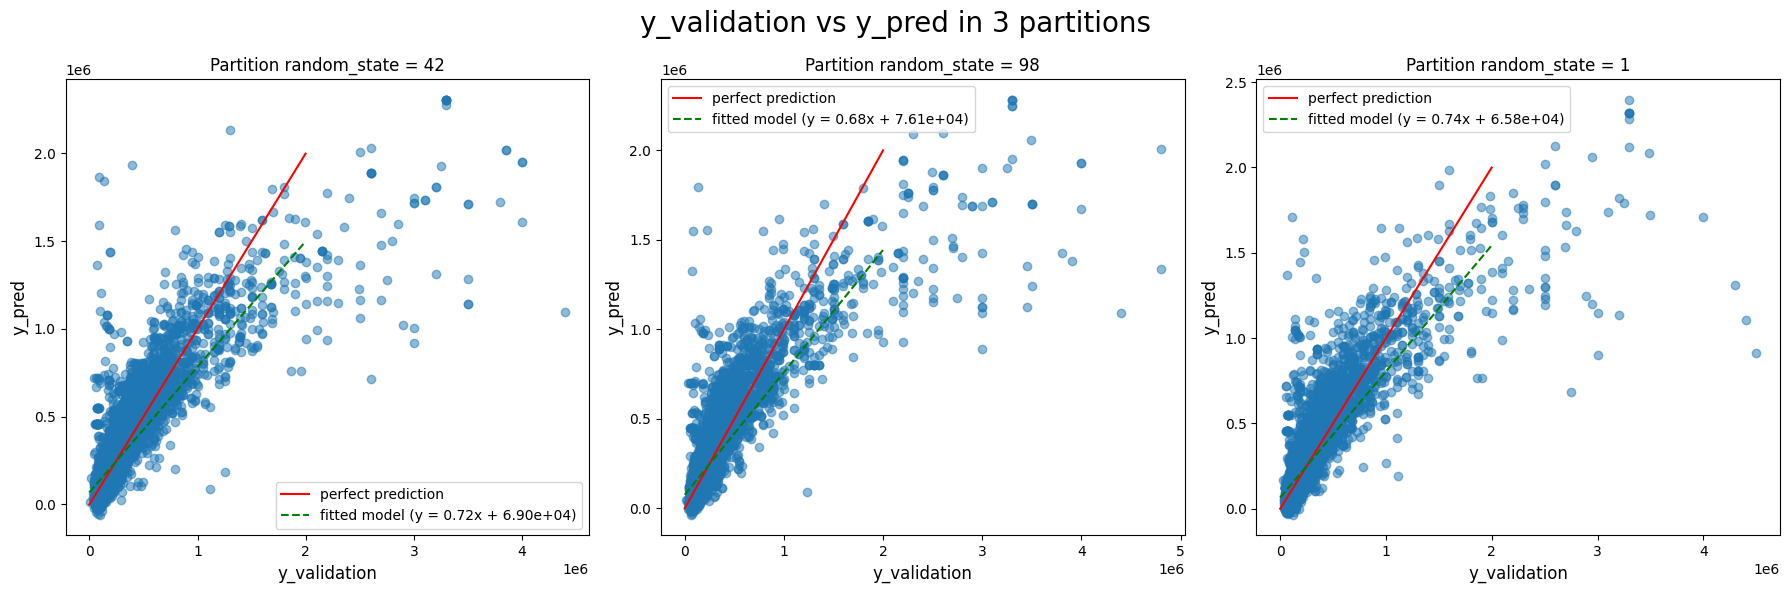

In [129]:
# We choose 3 random parititions
random_states_muestra = random.sample(random_states, 3)

# Perfect prediction
x = np.arange(0, 2000000, 1000)
y = x

# Subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('y_validation vs y_pred in 3 partitions', fontsize=20)

for idx, rs in enumerate(random_states_muestra):
    datos = partitions[rs]

    # Normalización
    scaler = StandardScaler()
    cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

    X_train_scaled = datos["X_train"].copy()
    X_val_scaled = datos["X_val"].copy()

    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train_scaled[cols_a_escalar])
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val_scaled[cols_a_escalar])

    # Model and prediction
    modelo = LinearRegression()
    modelo.fit(X_train_scaled, datos["y_train"])
    y_val_pred = modelo.predict(X_val_scaled)

    # Graph
    axs[idx].scatter(datos["y_val"], y_val_pred, alpha=0.5)
    axs[idx].plot(x, y, color="red", label="perfect prediction")

    # Fitted regression line
    m, b = np.polyfit(datos["y_val"], y_val_pred, 1)
    axs[idx].plot(x, m*x + b, color="green", linestyle="--", label=f"fitted model (y = {m:.2f}x + {b:.2e})")

    axs[idx].set_title(f'Partition random_state = {rs}')
    axs[idx].set_xlabel('y_validation', fontsize=12)
    axs[idx].set_ylabel('y_pred', fontsize=12)
    axs[idx].legend()

plt.tight_layout()
plt.show()

We can see that overalla there is a good prediction, but most properties with a high price are incorrectly predicted with a lower price

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19416\15078801.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dellia\AppData\Local\Programs\P

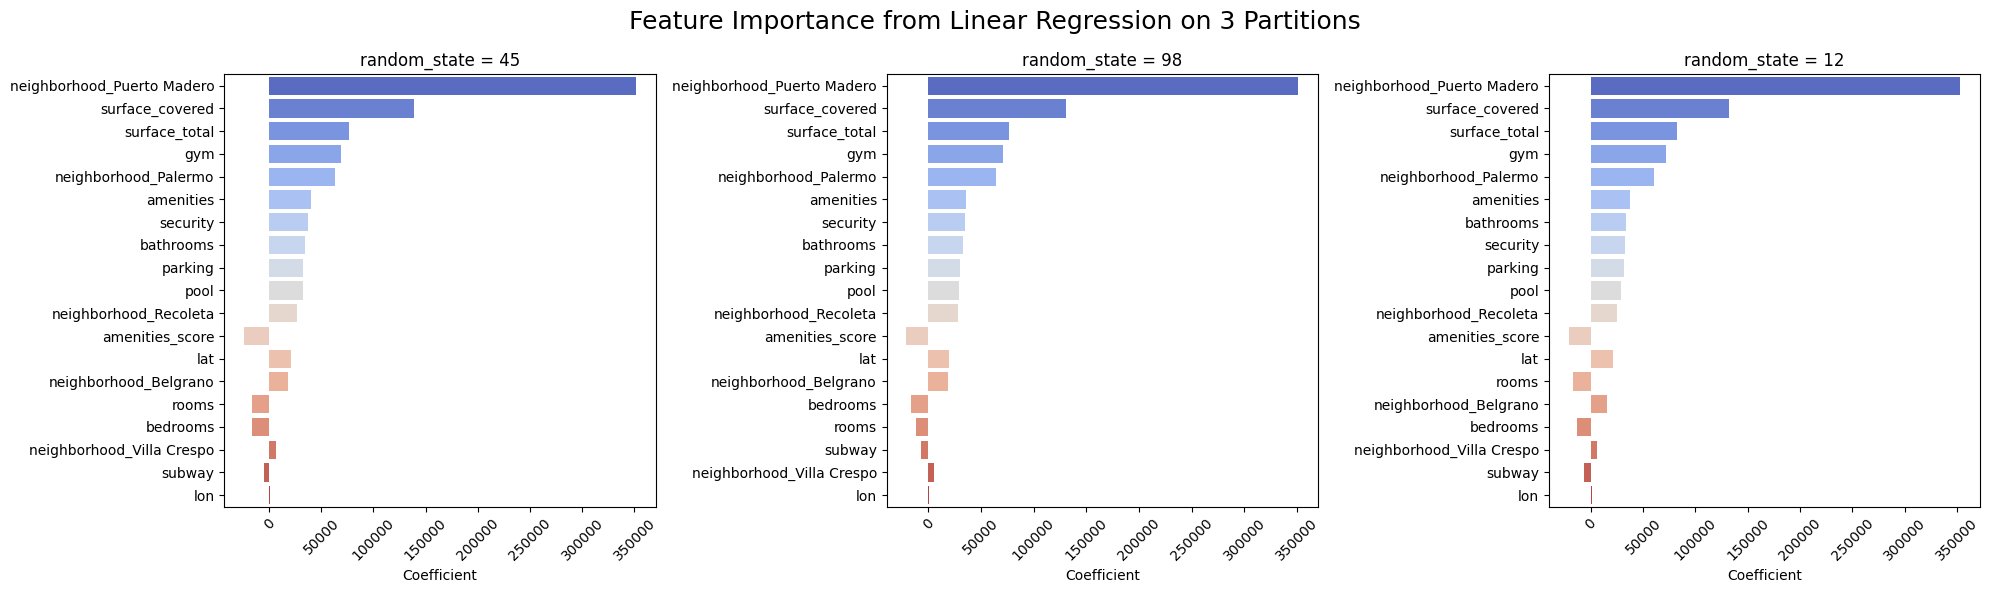

In [137]:
# Choose 3 random partitions
random_states_sample = random.sample(random_states, 3)

# Columns to scale
cols_to_scale = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Feature Importance from Linear Regression on 3 Partitions", fontsize=18)

for idx, rs in enumerate(random_states_sample):
    data = partitions[rs]

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = data["X_train"].copy()
    X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])

    # Linear regression model
    reg = LinearRegression()
    reg.fit(X_train_scaled, data["y_train"])

    # Coefficients
    coef_df = pd.DataFrame({
        "feature": X_train_scaled.columns,
        "coeficients": reg.coef_
    })
    coef_df["abs_coef"] = coef_df["coeficients"].abs()
    coef_df_sorted = coef_df.sort_values(by="abs_coef", ascending=False)

    # Plot
    sns.barplot(
        data=coef_df_sorted,
        x="coeficients",
        y="feature",
        palette="coolwarm",
        ax=axes[idx]
    )
    axes[idx].set_title(f"random_state = {rs}")
    axes[idx].set_xlabel("Coefficient")
    axes[idx].set_ylabel("")

    # Rotate x-axis tick labels
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Random forest regression

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19416\2109507131.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rf_melted, x="Set", y="MSE", ax=axes[0], palette="viridis")
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dellia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Dellia\AppData\Local\Programs\Pyt

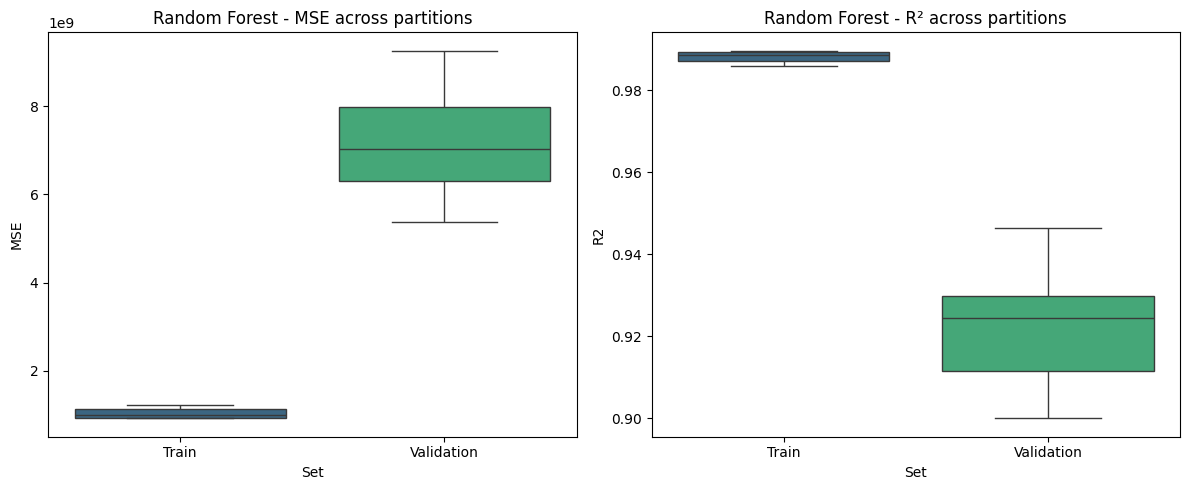

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Lists to store metrics
msq_rf_list = []
r2_rf_list = []
msq_train_rf_list = []
r2_train_rf_list = []

# Same partitions as before
random_states = [1] #5, 49, 42, 6, 15, 45, 12, 98, 10

for i in random_states:
    # Data split
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1764, random_state=i)

    # Normalization
    cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']
    scaler = StandardScaler()

    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()

    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train[cols_a_escalar])
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val[cols_a_escalar])

    # Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=i, n_jobs=-1)
    rf.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = rf.predict(X_train_scaled)
    y_val_pred = rf.predict(X_val_scaled)

    # Metrics
    msq_train_rf_list.append(mean_squared_error(y_train, y_train_pred))
    r2_train_rf_list.append(r2_score(y_train, y_train_pred))
    msq_rf_list.append(mean_squared_error(y_val, y_val_pred))
    r2_rf_list.append(r2_score(y_val, y_val_pred))

# Create long-format DataFrame for boxplots
df_rf_melted = pd.DataFrame({
    "MSE": msq_train_rf_list + msq_rf_list,
    "R2": r2_train_rf_list + r2_rf_list,
    "Set": ["Train"] * len(msq_train_rf_list) + ["Validation"] * len(msq_rf_list)
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_rf_melted, x="Set", y="MSE", ax=axes[0], palette="viridis")
axes[0].set_title("Random Forest - MSE across partitions")

sns.boxplot(data=df_rf_melted, x="Set", y="R2", ax=axes[1], palette="viridis")
axes[1].set_title("Random Forest - R² across partitions")

plt.tight_layout()
plt.show()


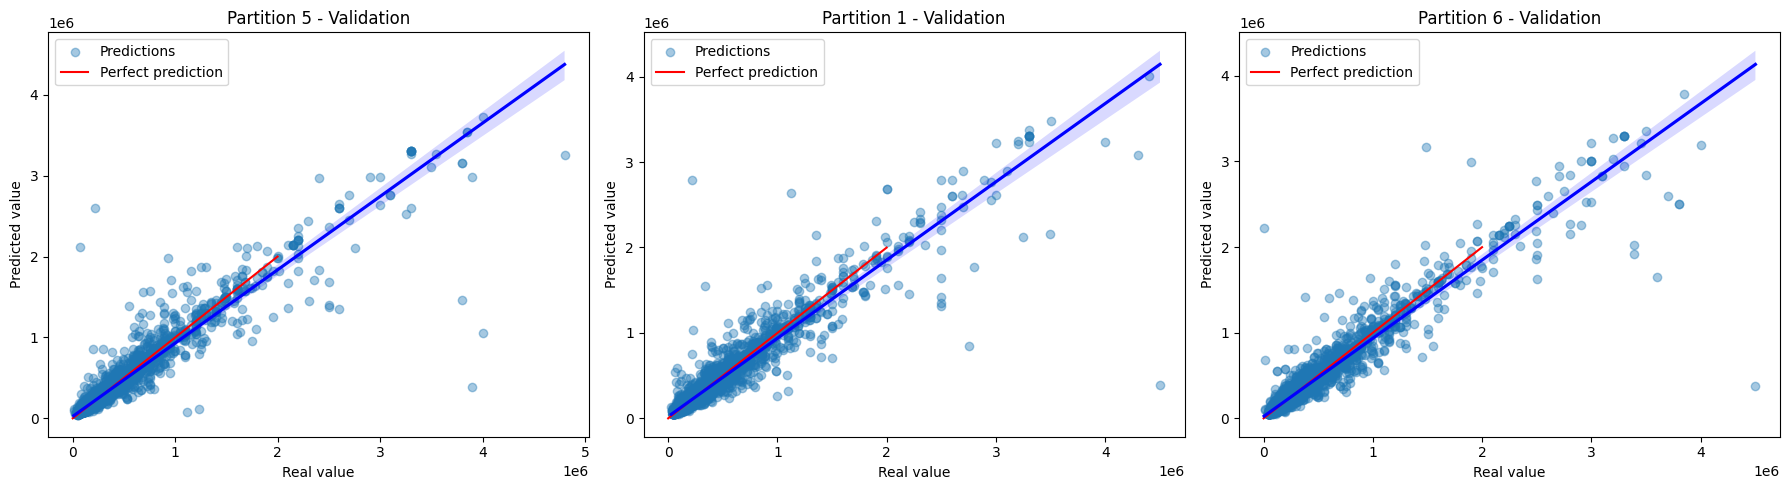

In [150]:


# Select 3 random partitions
random.seed(42)
selected_partitions = random.sample(list(partitions.keys()), 3)

# Features to scale
cols_a_escalar = ['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms', 'lat', 'lon', 'amenities_score']

# Plotting setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
x = np.arange(0, 2000000, 1000)
y = x

for idx, i in enumerate(selected_partitions):
    X_train = partitions[i]["X_train"]
    y_train = partitions[i]["y_train"]
    X_val = partitions[i]["X_val"]
    y_val = partitions[i]["y_val"]

    # Copy and scale only selected columns
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_train_scaled[cols_a_escalar] = scaler.fit_transform(X_train[cols_a_escalar])

    X_val_scaled = X_val.copy()
    X_val_scaled[cols_a_escalar] = scaler.transform(X_val[cols_a_escalar])

    # Train Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Predict
    y_val_pred = rf.predict(X_val_scaled)

    # Scatter plot of prediction
    axes[idx].scatter(y_val, y_val_pred, alpha=0.4, label="Predictions")
    axes[idx].plot(x, y, color="red", label="Perfect prediction")

    # Plot regression line
    sns.regplot(x=y_val, y=y_val_pred, scatter=False, ax=axes[idx], color="blue", line_kws={"label": "Regression line"})

    # Formatting
    axes[idx].set_title(f"Partition {i} - Validation")
    axes[idx].set_xlabel("Real value")
    axes[idx].set_ylabel("Predicted value")
    axes[idx].legend()

plt.tight_layout()
plt.show()
